### Customer Clustering with Self Organizing Map (SOM)

https://www.kaggle.com/code/jonathankristanto/customer-clustering-with-self-organizing-map-som/

### Import used packages

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Import the library #https://github.com/fcomitani/SimpSOM
import simpsom as sps


In [3]:
df_org = pd.read_csv('Mall_Customers.csv')
#print(df_org.columns)
df = df_org.copy()
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
train = df.values
train

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


<Figure size 2160x720 with 0 Axes>

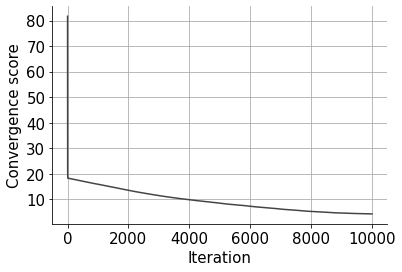

In [7]:
train = df.values

net = sps.SOMNet(10, 10, train, PBC=True) 
#net.train(start_learning_rate=0.1, epochs=10000)
net.train(start_learning_rate=0.1,epochs=10000, early_stop='bmudiff', 
      early_stop_patience=10, early_stop_tolerance=5e-10)


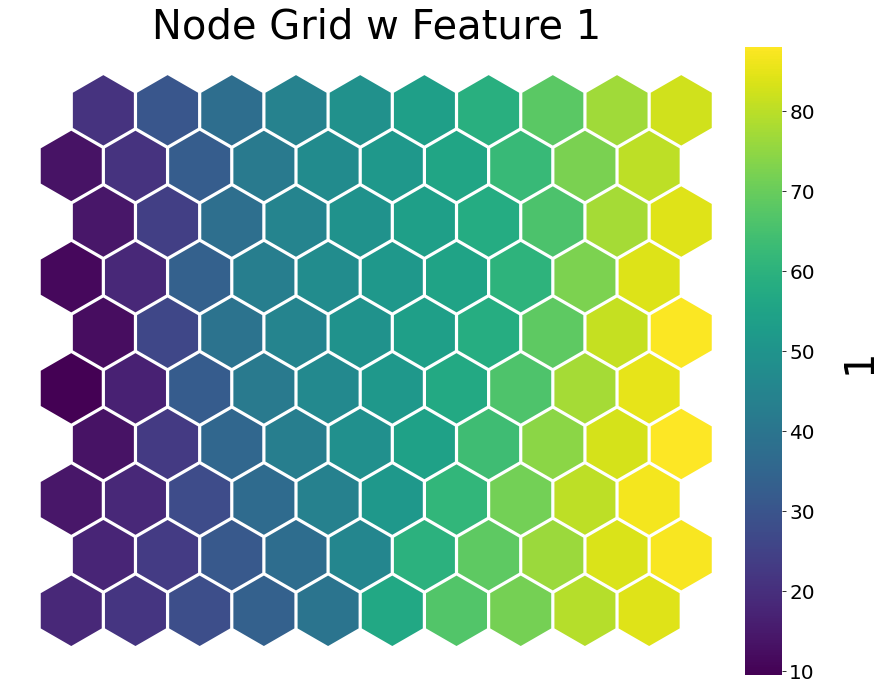

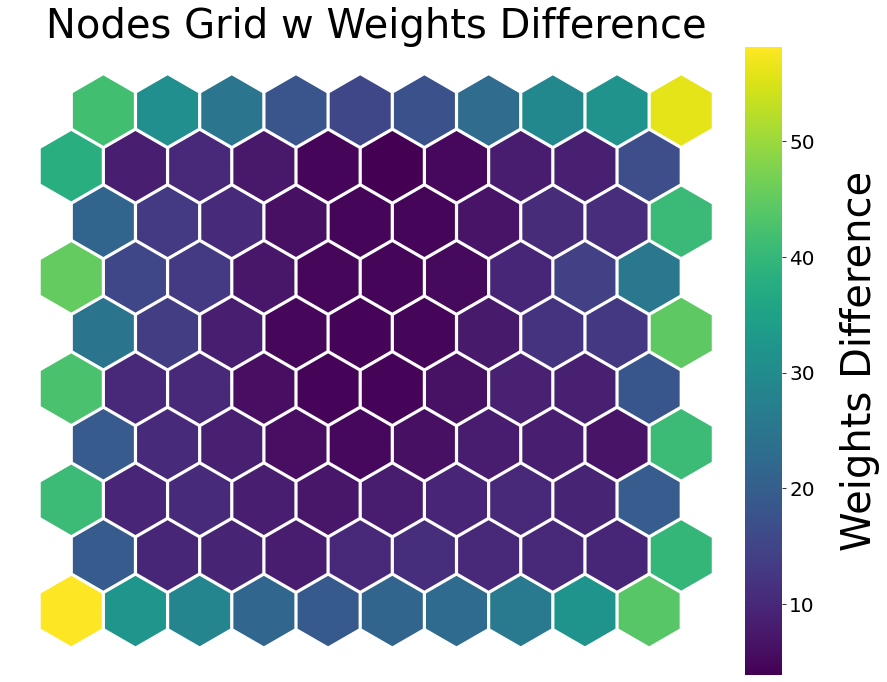

In [8]:
net.nodes_graph(colnum=1)
net.diff_graph()

In [9]:
net.diff_graph()
net.project(train)

[[1.5, 7.794228634059948],
 [9.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [9.5, 7.794228634059948],
 [1.5, 7.794228634059948],
 [8.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [9.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [8.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [9.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [8.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [9.5, 7.794228634059948],
 [1.5, 7.794228634059948],
 [7.5, 7.794228634059948],
 [1.5, 7.794228634059948],
 [9.5, 7.794228634059948],
 [1.5, 7.794228634059948],
 [8.5, 7.794228634059948],
 [0.0, 6.9282032302755105],
 [8.5, 7.794228634059948],
 [0.5, 6.062177826491071],
 [9.0, 6.9282032302755105],
 [1.5, 7.794228634059948],
 [7.5, 7.794228634059948],
 [1.5, 7.794228634059948],
 [9.5, 6.062177826491071],
 [0.5, 6.062177826491071],
 [8.0, 6.9282032302755105],
 [0.5, 6.062177826491071],
 [9.5, 6.062177826491071],
 [0.5, 6.062177826491071],
 [9.5, 6.062177826491071],
 [0.5, 6.0621778264

<Figure size 1000x1000 with 0 Axes>

In [10]:
cls = net.cluster(train, clus_type='KMeans') #'MeanShift') #

<Figure size 432x288 with 0 Axes>

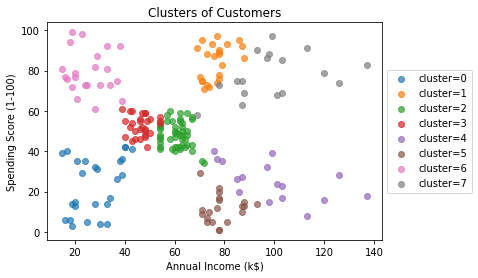

In [11]:
for c in range(len(cls)):
    plt.scatter(train[cls[c], 0],
                train[cls[c], 1], label='cluster='+str(c), alpha=.7)
    
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    

0 [110.02847419  18.25929384]
1 [99.25058797 17.79802061]
2 [89.47788108 14.19672091]
3 [80.6080143  13.53318679]
4 [76.27888711  9.59179316]
5 [67.53037853 12.33758932]
6 [46.38686176 11.14090153]
7 [30.48501254 14.2930968 ]
8 [24.151372   13.49491795]
9 [23.35124146 21.20658294]
10 [104.71841622  21.7149179 ]
11 [93.89939349 23.22514024]
12 [87.09144793 18.33290339]
13 [76.53130615 23.05984008]
14 [73.9095315  16.87624017]
15 [63.66311054 26.25990189]
16 [47.2651203  18.25194828]
17 [35.72159376 24.07396406]
18 [26.81380654 21.12836463]
19 [26.7087514  30.46596913]
20 [96.20287972 28.09483588]
21 [84.835382   31.20744755]
22 [80.38870543 27.65163372]
23 [69.74494595 35.40081886]
24 [67.71145294 32.2719498 ]
25 [60.58799105 39.63726114]
26 [52.04740232 33.75122989]
27 [44.78108942 38.02296438]
28 [33.02254203 32.43859946]
29 [33.93818731 37.65985545]
30 [86.47683863 33.67846452]
31 [77.42764323 37.23298885]
32 [73.13567968 36.82484686]
33 [65.83689626 42.79317119]
34 [63.62990802 41.4

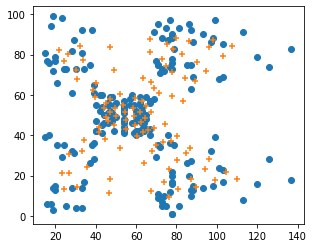

In [12]:
plt.axes(aspect=1)
plt.scatter(train[:,0],train[:,1])

w = np.ones([100,2])
for i in range(100):
    w[i,:] = net.node_list[i].weights
    print(i,net.node_list[i].weights)

plt.scatter(w[:,0],w[:,1],marker='+')    

In [13]:
w

array([[110.02847419,  18.25929384],
       [ 99.25058797,  17.79802061],
       [ 89.47788108,  14.19672091],
       [ 80.6080143 ,  13.53318679],
       [ 76.27888711,   9.59179316],
       [ 67.53037853,  12.33758932],
       [ 46.38686176,  11.14090153],
       [ 30.48501254,  14.2930968 ],
       [ 24.151372  ,  13.49491795],
       [ 23.35124146,  21.20658294],
       [104.71841622,  21.7149179 ],
       [ 93.89939349,  23.22514024],
       [ 87.09144793,  18.33290339],
       [ 76.53130615,  23.05984008],
       [ 73.9095315 ,  16.87624017],
       [ 63.66311054,  26.25990189],
       [ 47.2651203 ,  18.25194828],
       [ 35.72159376,  24.07396406],
       [ 26.81380654,  21.12836463],
       [ 26.7087514 ,  30.46596913],
       [ 96.20287972,  28.09483588],
       [ 84.835382  ,  31.20744755],
       [ 80.38870543,  27.65163372],
       [ 69.74494595,  35.40081886],
       [ 67.71145294,  32.2719498 ],
       [ 60.58799105,  39.63726114],
       [ 52.04740232,  33.75122989],
 

In [14]:
net.node_list[0].weights

array([110.02847419,  18.25929384])

In [15]:
cls = net.find_bmu_ix(train)

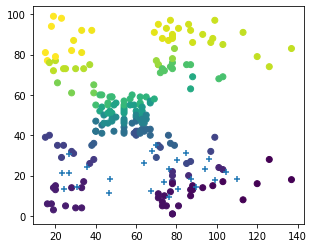

In [16]:
plt.axes(aspect=1)
plt.scatter(train[:,0],train[:,1],c=cls)

w = np.ones([25,2])
for i in range(25):
    w[i,:] = net.node_list[i].weights

plt.scatter(w[:,0],w[:,1],marker='+')    

<Figure size 2160x720 with 0 Axes>

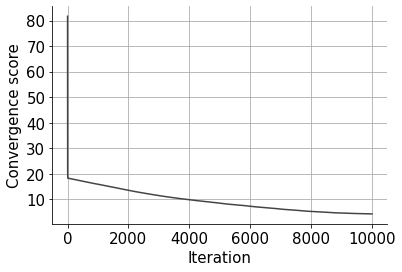

In [17]:
net.plot_convergence()